In [ ]:
# this file find weights for 5x5, 7x7, 9x9 patterns
# both for binary and non-binary patterns
# chemical naming: AHL is the same as OC6, CHL is the same as OHC14

In [8]:
from numpy.random import RandomState
import numpy as np
np.set_printoptions(precision=2,suppress=True)

import matplotlib.pyplot as plt
import scipy.optimize as opt
from math import *

from scipy.optimize import basinhopping,minimize,differential_evolution
from scipy.stats import moment

In [9]:
# basis functions, phi_pos, phi_neg
def transf_pos(x,K=2.0,y0=0.001,ym=1.5,n=2):
    result=ym*((x/K)**n)/(1+(x/K)**n)+ym*y0
    return result

def transf_neg(x,K=2.0,y0=0.001,ym=1.5,n=2):
    result=ym/(1+(x/K)**n)+y0*ym
    return result

#------------
# added during revision

def quant(data,levels):
    results=[]
    for i in range(0,len(data)):
        ind=np.argmin(abs(data[i]-np.array(levels)))
        results.append(levels[ind])
    return results


def wt_update(w,h,err_sign,levels):
    # h is a hidden variable
    w_=w.copy()
    for i in range(0,len(w)):
        indx_=levels.index(w[i])
        
        if err_sign[i]>0 and indx_<len(levels)-1:
            if h[i]>levels[indx_+1]:
                w_[i]=levels[indx_+1]
                
        if err_sign[i]<0 and indx_>0:
            if h[i]<levels[indx_-1]:
                w_[i]=levels[indx_-1]       
    return w_

In [10]:
def noisy(vector):
    result=[]
    for i in range(0,len(vector)):
        v=vector.copy()
        v[i]=np.logical_not(vector[i]).astype(int)
        #print(i,vector[i],v[i])
        result.append(v)
    return result

In [11]:
zv_5x5=[1,1,1,0,0,\
        0,0,1,0,0,\
        0,0,1,0,0,\
        0,0,1,0,0,\
        0,0,1,1,1]

zv_7x7=[1,1,1,1,0,0,0,\
        0,0,0,1,0,0,0,\
        0,0,0,1,0,0,0,\
        0,0,0,1,0,0,0,\
        0,0,0,1,0,0,0,\
        0,0,0,1,0,0,0,\
        0,0,0,1,1,1,1]

zv_9x9=[1,1,1,1,1,0,0,0,0,\
        0,0,0,0,1,0,0,0,0,\
        0,0,0,0,1,0,0,0,0,\
        0,0,0,0,1,0,0,0,0,\
        0,0,0,0,1,0,0,0,0,\
        0,0,0,0,1,0,0,0,0,\
        0,0,0,0,1,0,0,0,0,\
        0,0,0,0,1,0,0,0,0,\
        0,0,0,0,1,1,1,1,1]    

In [12]:
vv_5x5=[1,0,0,0,1,\
        1,0,0,0,1,\
        1,0,0,0,1,\
        0,1,0,1,0,\
        0,0,1,0,0]

vv_7x7=[1,0,0,0,0,0,1,\
        1,0,0,0,0,0,1,\
        1,0,0,0,0,0,1,\
        1,0,0,0,0,0,1,\
        0,1,0,0,0,1,0,\
        0,0,1,0,1,0,0,\
        0,0,0,1,0,0,0]

vv_9x9=[1,0,0,0,0,0,0,0,1,\
        1,0,0,0,0,0,0,0,1,\
        1,0,0,0,0,0,0,0,1,\
        1,0,0,0,0,0,0,0,1,\
        1,0,0,0,0,0,0,0,1,\
        0,1,0,0,0,0,0,1,0,\
        0,0,1,0,0,0,1,0,0,\
        0,0,0,1,0,1,0,0,0,\
        0,0,0,0,1,0,0,0,0]    

In [13]:
nv_5x5=[0,0,0,0,0,\
        0,1,1,1,0,\
        1,0,0,0,1,\
        1,0,0,0,1,\
        1,0,0,0,1]

nv_7x7=[0,0,0,0,0,0,0,\
        0,0,0,0,0,0,0,\
        0,1,1,1,1,1,0,\
        1,0,0,0,0,0,1,\
        1,0,0,0,0,0,1,\
        1,0,0,0,0,0,1,\
        1,0,0,0,0,0,1]

nv_9x9=[0,0,0,0,0,0,0,0,0,\
        0,0,0,0,0,0,0,0,0,\
        0,0,1,1,1,1,1,0,0,\
        0,1,0,0,0,0,0,1,0,\
        1,0,0,0,0,0,0,0,1,\
        1,0,0,0,0,0,0,0,1,\
        1,0,0,0,0,0,0,0,1,\
        1,0,0,0,0,0,0,0,1,\
        1,0,0,0,0,0,0,0,1]

In [14]:
# 5x5 pattern set
zpatterns=([zv_5x5]+noisy(zv_5x5))
vpatterns=([vv_5x5]+noisy(vv_5x5))
npatterns=([nv_5x5]+noisy(nv_5x5))

patterns_5x5=zpatterns+vpatterns+npatterns

In [15]:
# 7x7
zpatterns=([zv_7x7]+noisy(zv_7x7))
vpatterns=([vv_7x7]+noisy(vv_7x7))
npatterns=([nv_7x7]+noisy(nv_7x7))

patterns_7x7=zpatterns+vpatterns+npatterns

In [16]:
# 9x9
zpatterns=([zv_9x9]+noisy(zv_9x9))
vpatterns=([vv_9x9]+noisy(vv_9x9))
npatterns=([nv_9x9]+noisy(nv_9x9))

patterns_9x9=zpatterns+vpatterns+npatterns

In [50]:
# define variables
# for 5x5 patters, size=25, patterns=patterns_5x5
# for 7x7 patters, size=49, patterns=patterns_7x7
# for 9x9 patters, size=81, patterns=patterns_9x9
# binary inputs

size=81
patterns=patterns_9x9

target_L=0.0
target_H=1.2
lenth=int(len(patterns)/3)

target_0=np.array([target_H]*lenth+[target_L]*lenth+[target_L]*lenth)
target_1=np.array([target_L]*lenth+[target_H]*lenth+[target_L]*lenth)
target_2=np.array([target_L]*lenth+[target_L]*lenth+[target_H]*lenth)

target=target_0
#----
AHL_unit_level=33# uM 
transf_p=np.zeros(2)
transf_n=np.zeros(2)

# parameter numbers are approximated from values in Table 1
transf_p[0]=transf_pos(x=0,K=50,y0=0.1,ym=1.0,n=0.45)
transf_p[1]=transf_pos(x=AHL_unit_level,K=50,y0=0.1,ym=1.0,n=0.45)
transf_n[0]=transf_neg(x=0,K=0.252,y0=0.341,ym=1,n=0.67)
transf_n[1]=transf_neg(x=AHL_unit_level,K=0.252,y0=0.341,ym=1,n=0.67)

phi_pos=np.array([transf_p]*size)
phi_neg=np.array([transf_n]*size)

In [51]:
#for non-binary input

rnd_state=RandomState(1)
rand_seq=0.6*rnd_state.random_sample(size)+0.4
print('rand_seq: ',rand_seq)

phi_pos_ct=np.zeros(shape=phi_pos.shape)
phi_neg_ct=np.zeros(shape=phi_neg.shape)

phi_pos_ct.T[0]=phi_pos.T[0]
phi_pos_ct.T[1]=phi_pos.T[1]*rand_seq

phi_neg_ct.T[0]=phi_neg.T[0]
phi_neg_ct.T[1]=phi_neg.T[1]*(2-rand_seq)

rand_seq:  [0.65 0.83 0.4  0.58 0.49 0.46 0.51 0.61 0.64 0.72 0.65 0.81 0.52 0.93
 0.42 0.8  0.65 0.74 0.48 0.52 0.88 0.98 0.59 0.82 0.93 0.94 0.45 0.42
 0.5  0.93 0.46 0.65 0.97 0.72 0.82 0.59 0.81 0.9  0.41 0.85 0.99 0.85
 0.57 0.87 0.46 0.67 0.95 0.58 0.57 0.48 0.41 0.81 0.53 0.56 0.69 0.43
 0.74 0.49 0.75 0.82 0.46 0.65 0.82 0.65 0.43 0.72 0.8  0.71 0.97 0.75
 0.94 0.48 0.48 0.88 0.64 0.5  0.96 0.61 0.85 0.84 0.93]


In [29]:
# update for revision
def examine_output(w,P,phi_pos,phi_neg):
    y_n=np.zeros(len(P))
    w_ph_=np.zeros(len(P))

    for n in range(0,len(P)):
        pttn=np.array(P[n])
        
        phi_nw=get_phinw(w,pttn,phi_pos,phi_neg)
                
        w_ph_[n]=np.dot(w,phi_nw)/len(w)
        y_n[n]=activate(w_ph_[n])
        
    return y_n,w_ph_

def output_fcn(pttn,fcn):
    
    CHL_levels=np.zeros(len(pttn))
    for i in range(0,len(pttn)):
        CHL_levels[i]=fcn[i][pttn[i]]
        
    return CHL_levels

def activate(x):
    K,y0,ym_x,n= 1.10292919e+03,1.94584842e-02,2.15950963e+04,2.33038211e+00
    result=transf_pos(x.sum(),K=K,y0=y0/1e4,ym=2.0,n=n).sum()
    return result

def get_phinw(w,pttn,phi_pos,phi_neg):
    # conitnuous means wether negative weights are allowed to vary
    phi_nw=(1.0+w/np.sqrt(w**2))/2*output_fcn(pttn,phi_pos)+\
            (w/np.sqrt(w**2)-1)/2*output_fcn(pttn,phi_neg)

    return phi_nw

In [30]:
# update continous weights
# cont_ by default equals False
def train_step1(target,size,eta,phi_pos,phi_neg,pos=False,cont_=False):
    rndstate=RandomState(1)
    
    if cont_==True or pos==True:
        h=rndstate.random_sample(size)
    else:
        h=rndstate.random_sample(size)*(-10)
        
    print('h: ',h)
    r=size

    w_series=[]
    y_series=[]
    delta_series=[]

    for it in range(0,300):
        y_n=np.zeros(len(patterns))
        g_n=np.zeros(len(patterns))
        delta_err=np.zeros(size)
        phi_n=[]
      
        w=h.copy()   
        if cont_==False:
            w[w<0]=-735
        
        if pos==True:
            w[w<0]=0.1
            
        for n in range(0,len(patterns)):
            pttn=np.array(patterns[n])            
            phi_nw=get_phinw(w,pttn,phi_pos,phi_neg)

            # h is the hidden variable
            g_n[n]=np.dot(w,phi_nw)/r
            y_n[n]=activate(g_n[n])            
            
            tmp=(y_n[n]-target[n])
            tmp=min(target_H,tmp)
            phi_nw_pos=(1.0+w/np.sqrt(w**2))/2*output_fcn(pttn,phi_pos) 
            delta_err+=tmp*phi_nw

        w_series.append(w)
        h=h-eta*delta_err 
        y_series.append(y_n)
        delta_series.append(delta_err)
        
    return w,y_series,w_series,delta_series

In [31]:
# update weight in discrete levels
# all weights initial values are negative weights
def train_step1_dt(target,size,eta,phi_pos,phi_neg,wt_levels):
    h=np.ones(size)*wt_levels[0]
    w=h.copy()
    r=size

    w_series=[]
    y_series=[]
    delta_series=[]
        
    for it in range(0,300):
        y_n=np.zeros(len(patterns))
        g_n=np.zeros(len(patterns))
        delta_err=np.zeros(size)
        for n in range(0,len(patterns)):
            pttn=np.array(patterns[n])        
            phi_nw=get_phinw(w,pttn,phi_pos,phi_neg)

            g_n[n]=np.dot(w,phi_nw)/r
            y_n[n]=activate(g_n[n])            
            tmp=(y_n[n]-target[n])
            tmp=min(target_H,tmp)            
            delta_err+=tmp*phi_nw
            
        y_series.append(y_n)
        w_series.append(w)
        delta_series.append(delta_err)
        h=h-eta*delta_err
        w=wt_update(w,h,-np.sign(delta_err),wt_levels)
        
    p_=(2*np.array(y_series)-target_H)*(2*target-target_H)
    pm_=np.var(p_,axis=1)*10+(target_H**2-np.mean(p_,axis=1))
    
    w=w_series[np.argmin(pm_)]
    y=y_series[np.argmin(pm_)]
    
    return w,y

In [52]:
# train using discrete weights, binary input
wtlevels_=([-735.0,735,1906,2679.0,5500,10000])

# discrete weights
#w0_5x5,y0_5x5=train_step1_dt(target_0,25,eta=20,phi_pos=phi_pos,phi_neg=phi_neg,wt_levels=wtlevels_)
#w1_5x5,y1_5x5=train_step1_dt(target_1,25,eta=20,phi_pos=phi_pos,phi_neg=phi_neg,wt_levels=wtlevels_)
#w2_5x5,y2_5x5=train_step1_dt(target_2,25,eta=20,phi_pos=phi_pos,phi_neg=phi_neg,wt_levels=wtlevels_)

#w0_7x7,y0_7x7=train_step1_dt(target_0,49,eta=20,phi_pos=phi_pos,phi_neg=phi_neg,wt_levels=wtlevels_)
#w1_7x7,y1_7x7=train_step1_dt(target_1,49,eta=20,phi_pos=phi_pos,phi_neg=phi_neg,wt_levels=wtlevels_)
#w2_7x7,y2_7x7=train_step1_dt(target_2,49,eta=20,phi_pos=phi_pos,phi_neg=phi_neg,wt_levels=wtlevels_)

w0_9x9,y0_9x9=train_step1_dt(target_0,81,eta=20,phi_pos=phi_pos,phi_neg=phi_neg,wt_levels=wtlevels_)
w1_9x9,y1_9x9=train_step1_dt(target_1,81,eta=20,phi_pos=phi_pos,phi_neg=phi_neg,wt_levels=wtlevels_)
w2_9x9,y2_9x9=train_step1_dt(target_2,81,eta=20,phi_pos=phi_pos,phi_neg=phi_neg,wt_levels=wtlevels_)

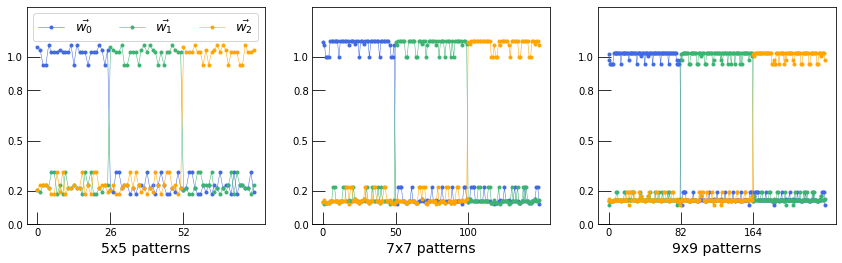

In [34]:
# demo example, for Fig 6a
ymax=1.3

fig=plt.figure(figsize=(14.5,4))
#=======
ax=fig.add_subplot(131)

line0,=ax.plot(np.arange(0,len(y0_5x5)),y0_5x5,marker='.',lw=0.5,color='royalblue',label='$\\vec{w_0}$')
line1,=ax.plot(np.arange(0,len(y1_5x5)),y1_5x5,marker='.',lw=0.5,color='mediumseagreen',label='$\\vec{w_1}$')
line2,=ax.plot(np.arange(0,len(y2_5x5)),y2_5x5,marker='.',lw=0.5,color='orange',label='$\\vec{w_2}$')
ax.set_ylim([0,ymax])
ax.tick_params(direction='in',size=12.5)
ax.set_yticks([0,0.2,0.5,0.8,1.0])
ax.set_xlabel('5x5 patterns',fontsize=14)
ax.legend(loc='upper left',ncol=3,fontsize=13)
ax.set_xticks([0,26,52])
#=======
ax=fig.add_subplot(132)

ax.plot(np.arange(0,len(y0_7x7)),y0_7x7,marker='.',lw=0.5,color='royalblue')
ax.plot(np.arange(0,len(y1_7x7)),y1_7x7,marker='.',lw=0.5,color='mediumseagreen')
ax.plot(np.arange(0,len(y2_7x7)),y2_7x7,marker='.',lw=0.5,color='orange')
ax.set_ylim([0,ymax])
ax.tick_params(direction='in',size=12.5)
ax.set_yticks([0,0.2,0.5,0.8,1.0])
ax.set_xlabel('7x7 patterns',fontsize=14)
ax.set_xticks([0,50,100])

#=======
ax=fig.add_subplot(133)

ax.plot(np.arange(0,len(y0_9x9)),y0_9x9,marker='.',lw=0.5,color='royalblue')
ax.plot(np.arange(0,len(y1_9x9)),y1_9x9,marker='.',lw=0.5,color='mediumseagreen')
ax.plot(np.arange(0,len(y2_9x9)),y2_9x9,marker='.',lw=0.5,color='orange')
ax.set_ylim([0,ymax])
ax.tick_params(direction='in',size=12.5)
ax.set_yticks([0,0.2,0.5,0.8,1.0])
ax.set_xlabel('9x9 patterns',fontsize=14)
ax.set_xticks([0,82,164])


In [53]:
# train using discrete weights, binary input
wtlevels_=([-735.0,735,1906,2679.0,5500,10000])

# discrete weights
#w0_ct5x5,y0_5x5_ct=train_step1_dt(target_0,25,eta=20,phi_pos=phi_pos_ct,phi_neg=phi_neg_ct,wt_levels=wtlevels_)
#w1_ct5x5,y1_5x5_ct=train_step1_dt(target_1,25,eta=20,phi_pos=phi_pos_ct,phi_neg=phi_neg_ct,wt_levels=wtlevels_)
#w2_ct5x5,y2_5x5_ct=train_step1_dt(target_2,25,eta=20,phi_pos=phi_pos_ct,phi_neg=phi_neg_ct,wt_levels=wtlevels_)

#w0_ct7x7,y0_7x7_ct=train_step1_dt(target_0,49,eta=20,phi_pos=phi_pos_ct,phi_neg=phi_neg_ct,wt_levels=wtlevels_)
#w1_ct7x7,y1_7x7_ct=train_step1_dt(target_1,49,eta=20,phi_pos=phi_pos_ct,phi_neg=phi_neg_ct,wt_levels=wtlevels_)
#w2_ct7x7,y2_7x7_ct=train_step1_dt(target_2,49,eta=20,phi_pos=phi_pos_ct,phi_neg=phi_neg_ct,wt_levels=wtlevels_)

w0_ct9x9,y0_9x9_ct=train_step1_dt(target_0,81,eta=20,phi_pos=phi_pos_ct,phi_neg=phi_neg_ct,wt_levels=wtlevels_)
w1_ct9x9,y1_9x9_ct=train_step1_dt(target_1,81,eta=20,phi_pos=phi_pos_ct,phi_neg=phi_neg_ct,wt_levels=wtlevels_)
w2_ct9x9,y2_9x9_ct=train_step1_dt(target_2,81,eta=20,phi_pos=phi_pos_ct,phi_neg=phi_neg_ct,wt_levels=wtlevels_)

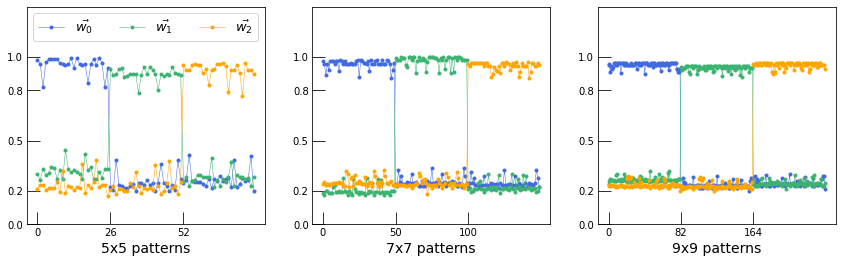

In [54]:
# demo Fig 6b
ymax=1.3

fig=plt.figure(figsize=(14.5,4))
#=======
ax=fig.add_subplot(131)

line0,=ax.plot(np.arange(0,len(y0_5x5_ct)),y0_5x5_ct,marker='.',lw=0.5,color='royalblue',label='$\\vec{w_0}$')
line1,=ax.plot(np.arange(0,len(y1_5x5_ct)),y1_5x5_ct,marker='.',lw=0.5,color='mediumseagreen',label='$\\vec{w_1}$')
line2,=ax.plot(np.arange(0,len(y2_5x5_ct)),y2_5x5_ct,marker='.',lw=0.5,color='orange',label='$\\vec{w_2}$')
ax.set_ylim([0,ymax])
ax.tick_params(direction='in',size=12.5)
ax.set_yticks([0,0.2,0.5,0.8,1.0])
ax.set_xlabel('5x5 patterns',fontsize=14)
ax.legend(loc='upper left',ncol=3,fontsize=13)
ax.set_xticks([0,26,52])
#=======
ax=fig.add_subplot(132)

ax.plot(np.arange(0,len(y0_7x7_ct)),y0_7x7_ct,marker='.',lw=0.5,color='royalblue')
ax.plot(np.arange(0,len(y1_7x7_ct)),y1_7x7_ct,marker='.',lw=0.5,color='mediumseagreen')
ax.plot(np.arange(0,len(y2_7x7_ct)),y2_7x7_ct,marker='.',lw=0.5,color='orange')
ax.set_ylim([0,ymax])
ax.tick_params(direction='in',size=12.5)
ax.set_yticks([0,0.2,0.5,0.8,1.0])
ax.set_xlabel('7x7 patterns',fontsize=14)
ax.set_xticks([0,50,100])


#=======
ax=fig.add_subplot(133)

ax.plot(np.arange(0,len(y0_9x9_ct)),y0_9x9_ct,marker='.',lw=0.5,color='royalblue')
ax.plot(np.arange(0,len(y1_9x9_ct)),y1_9x9_ct,marker='.',lw=0.5,color='mediumseagreen')
ax.plot(np.arange(0,len(y2_9x9_ct)),y2_9x9_ct,marker='.',lw=0.5,color='orange')
ax.set_ylim([0,ymax])
ax.tick_params(direction='in',size=12.5)
ax.set_yticks([0,0.2,0.5,0.8,1.0])
ax.set_xlabel('9x9 patterns',fontsize=14)
ax.set_xticks([0,82,164])


In [56]:
wt_num_5x5=[len(np.unique(w0_5x5)),len(np.unique(w1_5x5)),len(np.unique(w2_5x5))]
wt_num_7x7=[len(np.unique(w0_7x7)),len(np.unique(w1_7x7)),len(np.unique(w2_7x7))]
wt_num_9x9=[len(np.unique(w0_9x9)),len(np.unique(w1_9x9)),len(np.unique(w2_9x9))]

wt_num_ct5x5=[len(np.unique(w0_ct5x5)),len(np.unique(w1_ct5x5)),len(np.unique(w2_ct5x5))]
wt_num_ct7x7=[len(np.unique(w0_ct7x7)),len(np.unique(w1_ct7x7)),len(np.unique(w2_ct7x7))]
wt_num_ct9x9=[len(np.unique(w0_ct9x9)),len(np.unique(w1_ct9x9)),len(np.unique(w2_ct9x9))]

Text(0.5, 1.0, '$9\\times 9$ patterns')

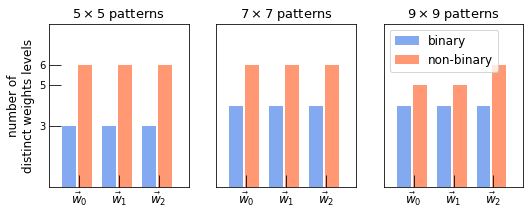

In [57]:
# demo Fig S22
fig=plt.figure(figsize=(8.5,3))
#------------
ax=fig.add_subplot(131)

ax.bar(x=np.linspace(0,len(wt_num_5x5)-1,len(wt_num_5x5)),height=wt_num_5x5,width=0.35,alpha=0.8,color='cornflowerblue',label='binary')
ax.bar(x=np.linspace(0,len(wt_num_ct5x5)-1,len(wt_num_ct5x5))+0.4,height=wt_num_ct5x5,width=0.35,alpha=0.8,color='coral',label='nonbinary')

ax.tick_params(direction='in',size=12)

ax.set_yticks([3,5,6])
ax.set_ylim([0,8])

ax.set_xlim([-0.5,3])
ax.set_xticks([0.25,1.25,2.25])
ax.set_xticklabels(['$\\vec{w}_0$','$\\vec{w}_1$','$\\vec{w}_2$'],fontsize=12)

ax.set_title('$5\\times 5$ patterns',fontsize=13)

ax.set_ylabel('number of\ndistinct weights levels',fontsize=12)
#-------------------
ax=fig.add_subplot(132)

ax.bar(x=np.linspace(0,len(wt_num_7x7)-1,len(wt_num_7x7)),height=wt_num_7x7,width=0.35,alpha=0.8,color='cornflowerblue',label='binary patterns')
ax.bar(x=np.linspace(0,len(wt_num_ct7x7)-1,len(wt_num_ct7x7))+0.4,height=wt_num_ct7x7,width=0.35,alpha=0.8,color='coral',label='nonbinary patterns')

ax.tick_params(direction='in',size=12)

ax.set_xlim([-0.5,3])
ax.set_xticks([0.25,1.25,2.25])
ax.set_xticklabels(['$\\vec{w}_0$','$\\vec{w}_1$','$\\vec{w}_2$'],fontsize=12)

ax.set_yticks([])
ax.set_ylim([0,8])

ax.set_title('$7\\times 7$ patterns',fontsize=13)

#--------------------
ax=fig.add_subplot(133)

ax.bar(x=np.linspace(0,len(wt_num_9x9)-1,len(wt_num_9x9)),height=wt_num_9x9,width=0.35,alpha=0.8,color='cornflowerblue',label='binary')
ax.bar(x=np.linspace(0,len(wt_num_ct9x9)-1,len(wt_num_ct9x9))+0.4,height=wt_num_ct9x9,width=0.35,alpha=0.8,color='coral',label='non-binary')

ax.tick_params(direction='in',size=12)
ax.legend(loc='upper left',fontsize=12)

ax.set_xlim([-0.5,3])
ax.set_xticks([0.25,1.25,2.25])
ax.set_xticklabels(['$\\vec{w}_0$','$\\vec{w}_1$','$\\vec{w}_2$'],fontsize=12)

ax.set_yticks([])
ax.set_ylim([0,8])

ax.set_title('$9\\times 9$ patterns',fontsize=13)